## Time series Forecasting with Prophet and Hypertuning ##

In [ ]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Importing data
elec_consump = pd.read_csv('AEP_hourly.csv')
elec_consump.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


The data shows the electric power in MW in the US from 2004 to 2018 in an hourly period

In [3]:
# Shape of the data
elec_consump.shape

(121273, 2)

### Cleaning the data ###

In [4]:
# Checking for nas
elec_consump.isna().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [5]:
# Checking for nulls
elec_consump.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [6]:
# Renaming columns
elec_consump.rename(columns = {'AEP_MW': 'consumption'}, inplace = True)
elec_consump.head()

,Datetime,consumption
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [7]:
# Sorting in the increasing order of Datetime
elec_consump = elec_consump.sort_values(by='Datetime', ascending=True)
elec_consump

,Datetime,consumption
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0


In [8]:
# Convert Datetime column to datetime type
elec_consump['Datetime'] = pd.to_datetime(elec_consump['Datetime'])

# Extracting time part
elec_hourly = pd.DataFrame(elec_consump)
elec_hourly['time'] = elec_hourly['Datetime'].dt.hour
elec_hourly['day'] = elec_hourly['Datetime'].dt.day
elec_hourly['day_of_week'] = elec_hourly['Datetime'].dt.day_name()
elec_hourly['month'] = elec_hourly['Datetime'].dt.month_name()
elec_hourly['year'] = elec_hourly['Datetime'].dt.year
elec_hourly

,Datetime,consumption,time,day,day_of_week,month,year
2183,2004-10-01 01:00:00,12379.0,1,1,Friday,October,2004
2184,2004-10-01 02:00:00,11935.0,2,1,Friday,October,2004
2185,2004-10-01 03:00:00,11692.0,3,1,Friday,October,2004
2186,2004-10-01 04:00:00,11597.0,4,1,Friday,October,2004
2187,2004-10-01 05:00:00,11681.0,5,1,Friday,October,2004
...,...,...,...,...,...,...,...
116157,2018-08-02 20:00:00,17673.0,20,2,Thursday,August,2018
116158,2018-08-02 21:00:00,17303.0,21,2,Thursday,August,2018
116159,2018-08-02 22:00:00,17001.0,22,2,Thursday,August,2018
116160,2018-08-02 23:00:00,15964.0,23,2,Thursday,August,2018


### Exploratory Data Analysis ###

In [9]:
# Basic Descriptive statistics for the consumption
elec_consump['consumption'].describe()

count    121273.000000
mean      15499.513717
std        2591.399065
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: consumption, dtype: float64

In [10]:
# Setting the 'date' column as the index
elec_consump.set_index('Datetime', inplace=True)

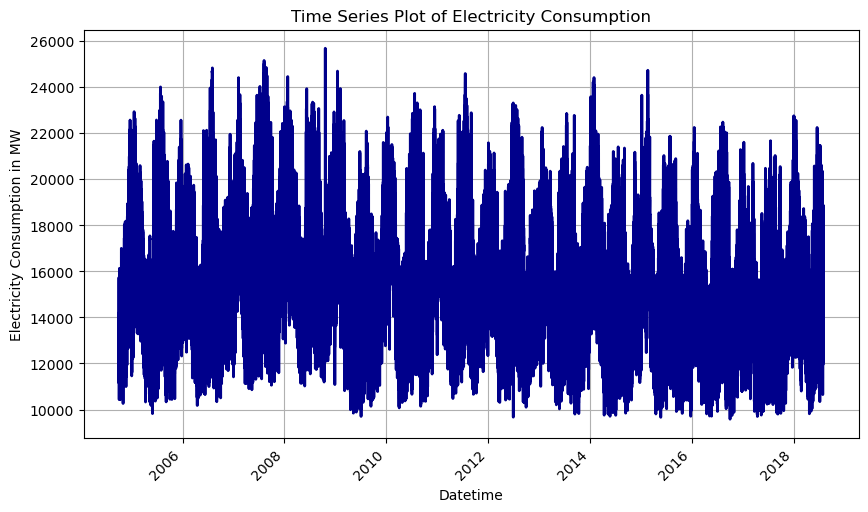

In [11]:
# Plotting the whole time series data
plt.figure(figsize=(10, 6))
elec_consump['consumption'].plot(color='darkblue', linewidth=2)

# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Electricity Consumption in MW')
plt.title('Time Series Plot of Electricity Consumption')
plt.xticks(rotation = 45)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

In [12]:
# Setting the 'date' column as the index
elec_consump.reset_index('Datetime', inplace=True)

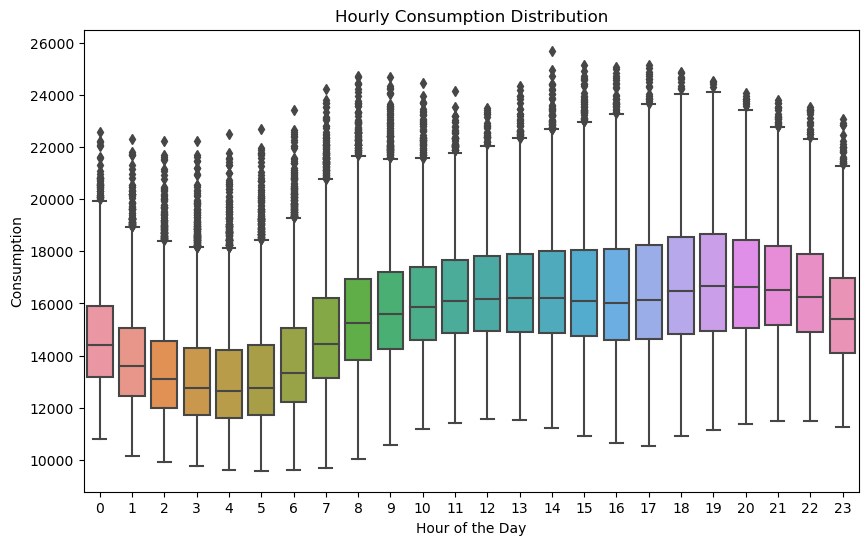

In [13]:
# Create the boxplot for hourly consumption using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='time', y='consumption', data = elec_hourly)

# Set plot labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Consumption')
plt.title('Hourly Consumption Distribution')

# Show the plot
plt.show()

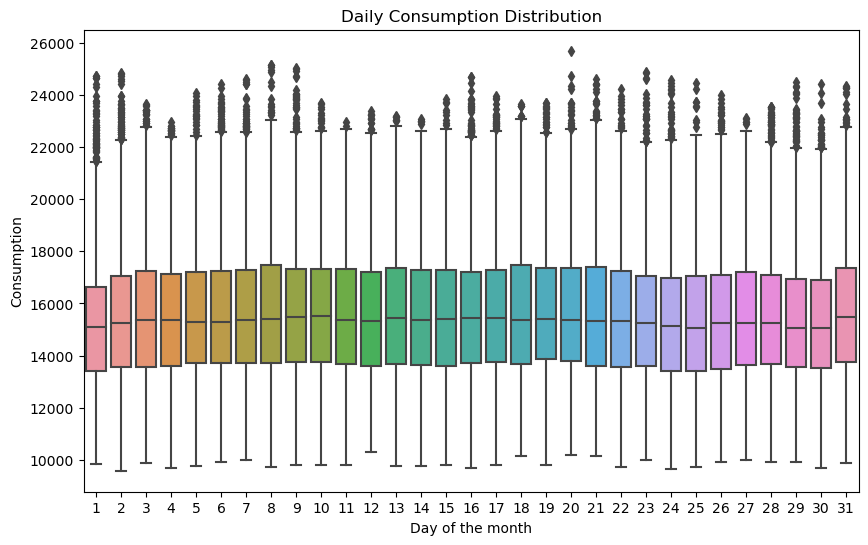

In [14]:
# Create the boxplot for daily consumption using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='consumption', data = elec_hourly)

# Set plot labels and title
plt.xlabel('Day of the month')
plt.ylabel('Consumption')
plt.title('Daily Consumption Distribution')

# Show the plot
plt.show()

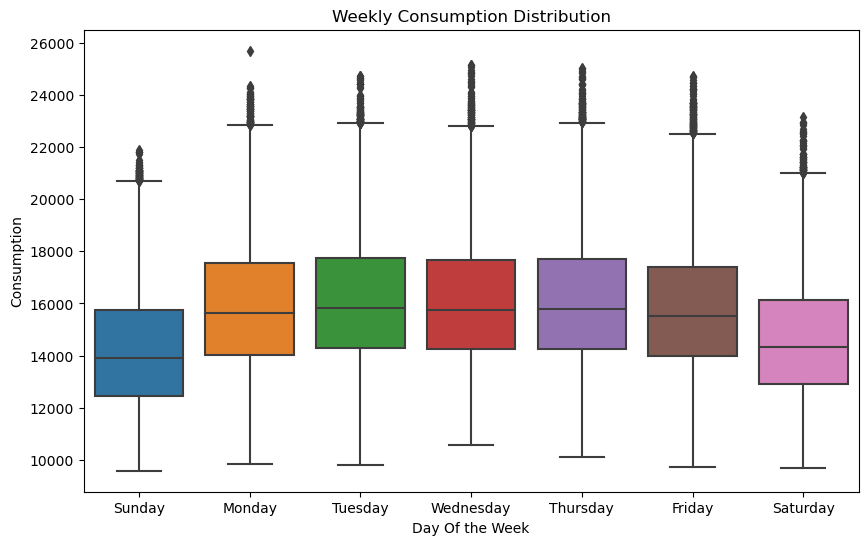

In [15]:
# Create the boxplot for weekly consumption using seaborn
plt.figure(figsize=(10, 6))

# Define the order of the days, starting from Sunday to Saturday
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

sns.boxplot(x='day_of_week', y='consumption', data = elec_hourly, order = day_order)

# Set plot labels and title
plt.xlabel('Day Of the Week')
plt.ylabel('Consumption')
plt.title('Weekly Consumption Distribution')

# Show the plot
plt.show()

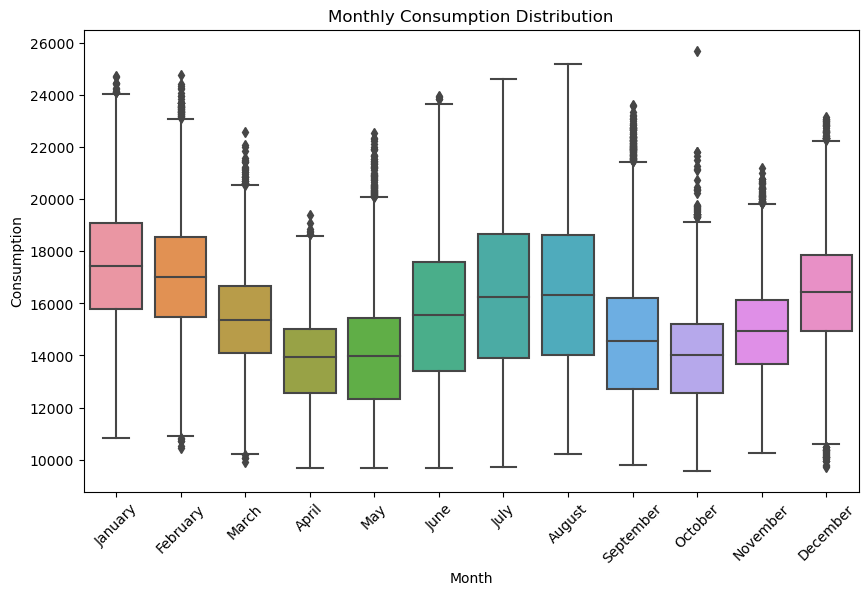

In [16]:
# Create the boxplot for monthly consumption using seaborn
plt.figure(figsize=(10, 6))

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
sns.boxplot(x='month', y='consumption', data = elec_hourly, order = month_order)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.title('Monthly Consumption Distribution')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

From these EDA plots it is clear that a **daily, weekly, yearly** seasonality exists.

### Time series Analysis ###

#### KPSS Test to verify Stationarity ####

In [17]:
# import kpss
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_result = kpss(elec_consump['consumption'], regression='c', nlags='auto')

# Output the KPSS test results
print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Lags Used:', kpss_result[2])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print(f'   {key} : {value}')

KPSS Statistic: 6.942701981096889
p-value: 0.01
Lags Used: 166
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


/var/folders/gv/9rdl5b851912bg6vpps84lh40000gn/T/ipykernel_27875/3547034265.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(elec_consump['consumption'], regression='c', nlags='auto')


The p-value of 0.01 which is less than 0.05 says that we can reject the null hypothesis. This tells the data is non-stationary as per the test. 


#### Plotting Periodogram to identify the seasonalities ####

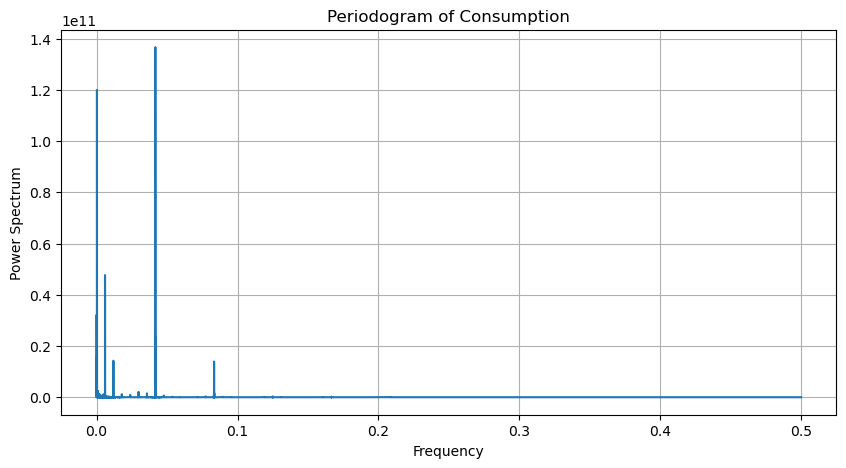

In [18]:
from scipy.signal import periodogram

# Extract the 'trip_count' time series
consump = elec_consump['consumption'].values

# Compute the periodogram
frequencies, power_spectrum = periodogram(consump, fs=1.0)  # fs is the sampling frequency

# Plot the periodogram
plt.figure(figsize=(10, 5))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('Periodogram of Consumption')
plt.grid()
plt.show()

In [19]:
# Sort the power spectrum in descending order and get the indices of the top 5 values
top_8_indices = np.argsort(power_spectrum)[-8:][::-1]

# Extract the corresponding top 5 frequencies and power values
top_8_frequencies = frequencies[top_8_indices]

# Print the top 5 frequencies and their corresponding power values
print("Top 8 Frequencies with Maximum Power:", top_8_frequencies)


Top 8 Frequencies with Maximum Power: [4.16745689e-02 2.30884038e-04 5.95350985e-03 8.24585852e-06
 2.22638180e-04 4.15591269e-02 4.17900110e-02 4.16828148e-02]


Here, if you see the first frequency 0.0416745689, this corresponds to a period of 1/0.0416745689 = 24 hrs, which indeed shows a daily period. This pinpoints to daily seasonality. The next frequency 0.000230884, corresponds to 1/0.000230884 periods which is 180 days or half year. The next frquency also corresponds to half year which so combining 2nd and third frequency we get a yearly seasonality. A weekly seasonality is also showed by the 8th frequency.

### Train Test Split ###

In [20]:
# Calculate the split index (80% for training, 20% for testing)
train_size = int(0.8 * len(elec_consump))

# Split the data chronologically
consump_train = elec_consump[:train_size]  # Training on the first 80% of the data
consump_test = elec_consump[train_size:]   # Testing on the remaining 20%

# Check the sizes of the splits
print(f"Train size: {len(consump_train)}")
print(f"Test size: {len(consump_test)}")

Train size: 97018
Test size: 24255


### Time Series Forecasting - Prophet ###

In [21]:
from prophet import Prophet
from prophet.utilities import regressor_coefficients
from prophet.plot import plot_plotly, plot_components_plotly

In [22]:
# Renaming the train and test data set columns for prophet format
consump_train = consump_train.rename(columns = {'Datetime':'ds', 'consumption': 'y'})
consump_test = consump_test.rename(columns = {'Datetime':'ds', 'consumption': 'y'})

In [23]:
# Defining the model
m = Prophet(weekly_seasonality = True, yearly_seasonality = True, 
            seasonality_mode = 'additive',
            seasonality_prior_scale = 10)
m.add_country_holidays(country_name = 'US')
m.add_seasonality(name ='daily', period = 1, fourier_order = 5)

01:54:44 - cmdstanpy - INFO - Chain [1] start processing
01:55:19 - cmdstanpy - INFO - Chain [1] done processing


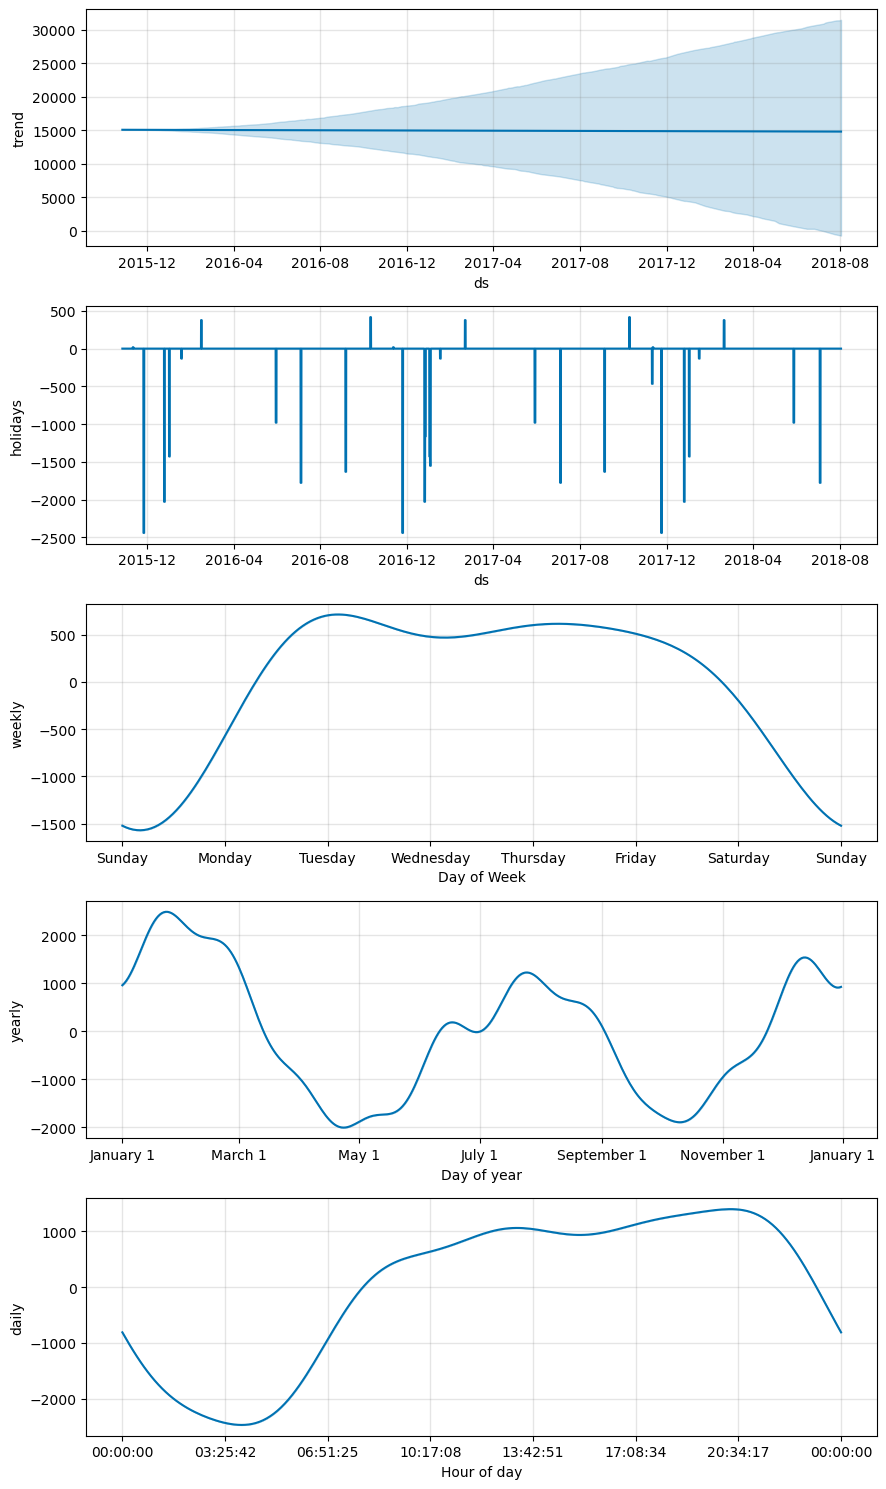

In [24]:
# Predicting using the model
m.fit(consump_train)
future   = consump_test.copy()
forecast = m.predict(future)
fig = m.plot_components(forecast)

In [25]:
# Forecasts with time and predicted trip_counts
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-10-27 10:00:00,15060.710882,12973.737208,17005.876952
1,2015-10-27 11:00:00,15203.041204,13292.488130,17132.729689
2,2015-10-27 12:00:00,15384.821985,13481.626155,17319.610745
3,2015-10-27 13:00:00,15482.404480,13554.881074,17339.076963
4,2015-10-27 14:00:00,15428.506450,13526.751261,17263.379821
...,...,...,...,...
24250,2018-08-02 20:00:00,17720.991426,1967.336821,34721.112090
24251,2018-08-02 21:00:00,17662.668058,1881.965228,34372.746825
24252,2018-08-02 22:00:00,17273.320973,1173.735385,34074.437500
24253,2018-08-02 23:00:00,16470.846833,859.943975,33816.068101


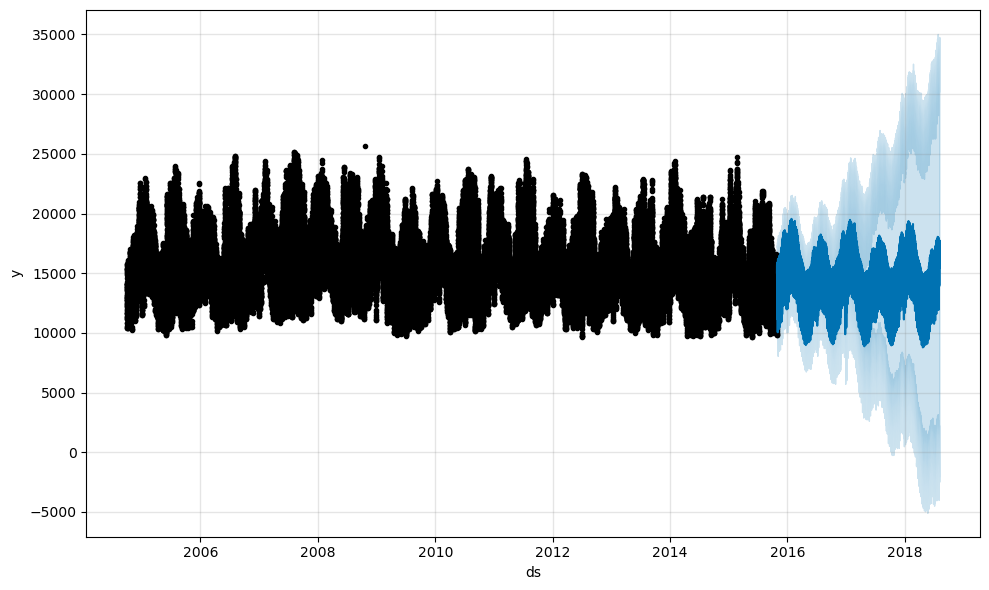

In [26]:
# Plotting Forecasts
fig1 = m.plot(forecast)

In [27]:
# Actual vs Predicted 
prophet_df = pd.DataFrame({
    'time': forecast['ds'].values,
    'Predicted_consump': forecast['yhat'].values,
    'Actual_consump':consump_test['y'].values
})

prophet_df

,time,Predicted_consump,Actual_consump
0,2015-10-27 10:00:00,15060.710882,15147.0
1,2015-10-27 11:00:00,15203.041204,14796.0
2,2015-10-27 12:00:00,15384.821985,14718.0
3,2015-10-27 13:00:00,15482.404480,14689.0
4,2015-10-27 14:00:00,15428.506450,14609.0
...,...,...,...
24250,2018-08-02 20:00:00,17720.991426,17673.0
24251,2018-08-02 21:00:00,17662.668058,17303.0
24252,2018-08-02 22:00:00,17273.320973,17001.0
24253,2018-08-02 23:00:00,16470.846833,15964.0


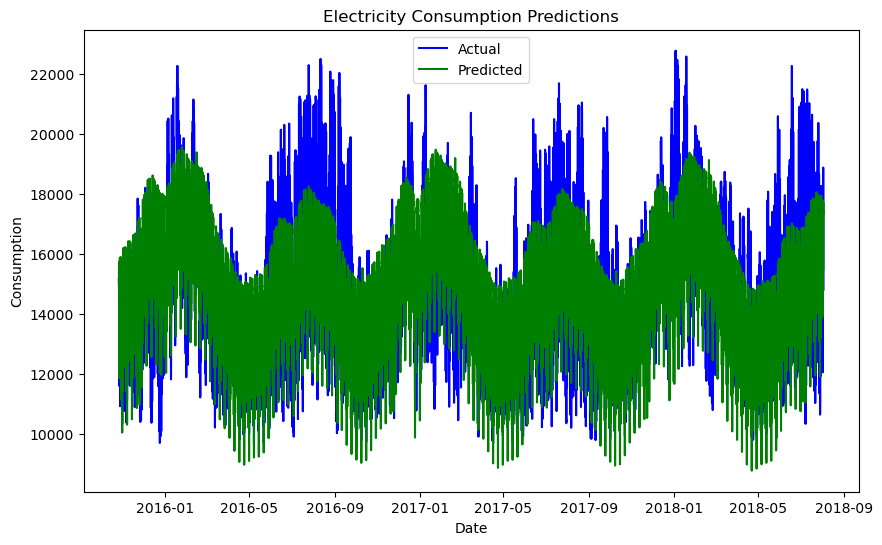

In [28]:
# Plotting The actual vs predicted for Prophet model
plt.figure(figsize=(10, 6))
plt.plot(prophet_df['time'], prophet_df['Actual_consump'], label='Actual', color = 'blue')
plt.plot(prophet_df['time'], prophet_df['Predicted_consump'], label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Electricity Consumption Predictions')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math


# Calculate evaluation metrics
prophet_mse = mean_squared_error(prophet_df['Actual_consump'], prophet_df['Predicted_consump'])
prophet_rmse = math.sqrt(prophet_mse)
prophet_mae = mean_absolute_error(prophet_df['Actual_consump'], prophet_df['Predicted_consump'])
prophet_mape = mean_absolute_percentage_error(prophet_df['Actual_consump'], prophet_df['Predicted_consump'])

print(f'Mean Squared Error: {prophet_mse}')
print(f'Root Mean Squared Error: {prophet_rmse}')
print(f'Mean Absolute Error: {prophet_mae}')
print(f'Mean Absolute Percentage Error: {prophet_mape}')

Mean Squared Error: 3209980.042952143
Root Mean Squared Error: 1791.6417172392876
Mean Absolute Error: 1399.3561743033126
Mean Absolute Percentage Error: 0.09450046760450043


### Hypertuning ###

In [30]:
import itertools
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['multiplicative','additive']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Perform cross-validation for each parameter combination
for params in all_params:
    
    m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, **params).fit(consump_train) 

    # Perform cross-validation (adjust initial, period, and horizon appropriately)
    df_cv = cross_validation(m, 
                                # 1 year gap between each fold
                             horizon = '24255 hours',   # Forecast 1 year ahead
                             parallel = 'processes')  # Use parallel processing
    
    # Calculate performance metrics
    df_p = performance_metrics(df_cv, rolling_window=1)
    
    # Append the RMSE for this set of parameters
    rmses.append(df_p['rmse'].values[0])

# Store the tuning results in a DataFrame
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

# Output the best parameters
best_params = tuning_results.loc[tuning_results['rmse'].idxmin()]
print("Best parameters:", best_params)

01:55:27 - cmdstanpy - INFO - Chain [1] start processing
01:55:32 - cmdstanpy - INFO - Chain [1] done processing
01:55:36 - cmdstanpy - INFO - Chain [1] start processing
01:55:42 - cmdstanpy - INFO - Chain [1] done processing
01:55:49 - cmdstanpy - INFO - Chain [1] start processing
01:55:53 - cmdstanpy - INFO - Chain [1] done processing
01:55:56 - cmdstanpy - INFO - Chain [1] start processing
01:56:00 - cmdstanpy - INFO - Chain [1] done processing
01:56:07 - cmdstanpy - INFO - Chain [1] start processing
01:56:12 - cmdstanpy - INFO - Chain [1] done processing
01:56:15 - cmdstanpy - INFO - Chain [1] start processing
01:56:21 - cmdstanpy - INFO - Chain [1] done processing
01:56:29 - cmdstanpy - INFO - Chain [1] start processing
01:56:33 - cmdstanpy - INFO - Chain [1] done processing
01:56:36 - cmdstanpy - INFO - Chain [1] start processing
01:56:43 - cmdstanpy - INFO - Chain [1] done processing
01:56:50 - cmdstanpy - INFO - Chain [1] start processing
01:56:54 - cmdstanpy - INFO - Chain [1]

Best parameters: changepoint_prior_scale          0.001
seasonality_prior_scale           0.01
seasonality_mode              additive
rmse                       1718.606001
Name: 1, dtype: object


After hyper tuning, the changepoint prior scale and seasonality prior scale has been updated to 0.001 and 0.01 respectively.

### Hypertuned Version ###

02:20:44 - cmdstanpy - INFO - Chain [1] start processing
02:20:50 - cmdstanpy - INFO - Chain [1] done processing


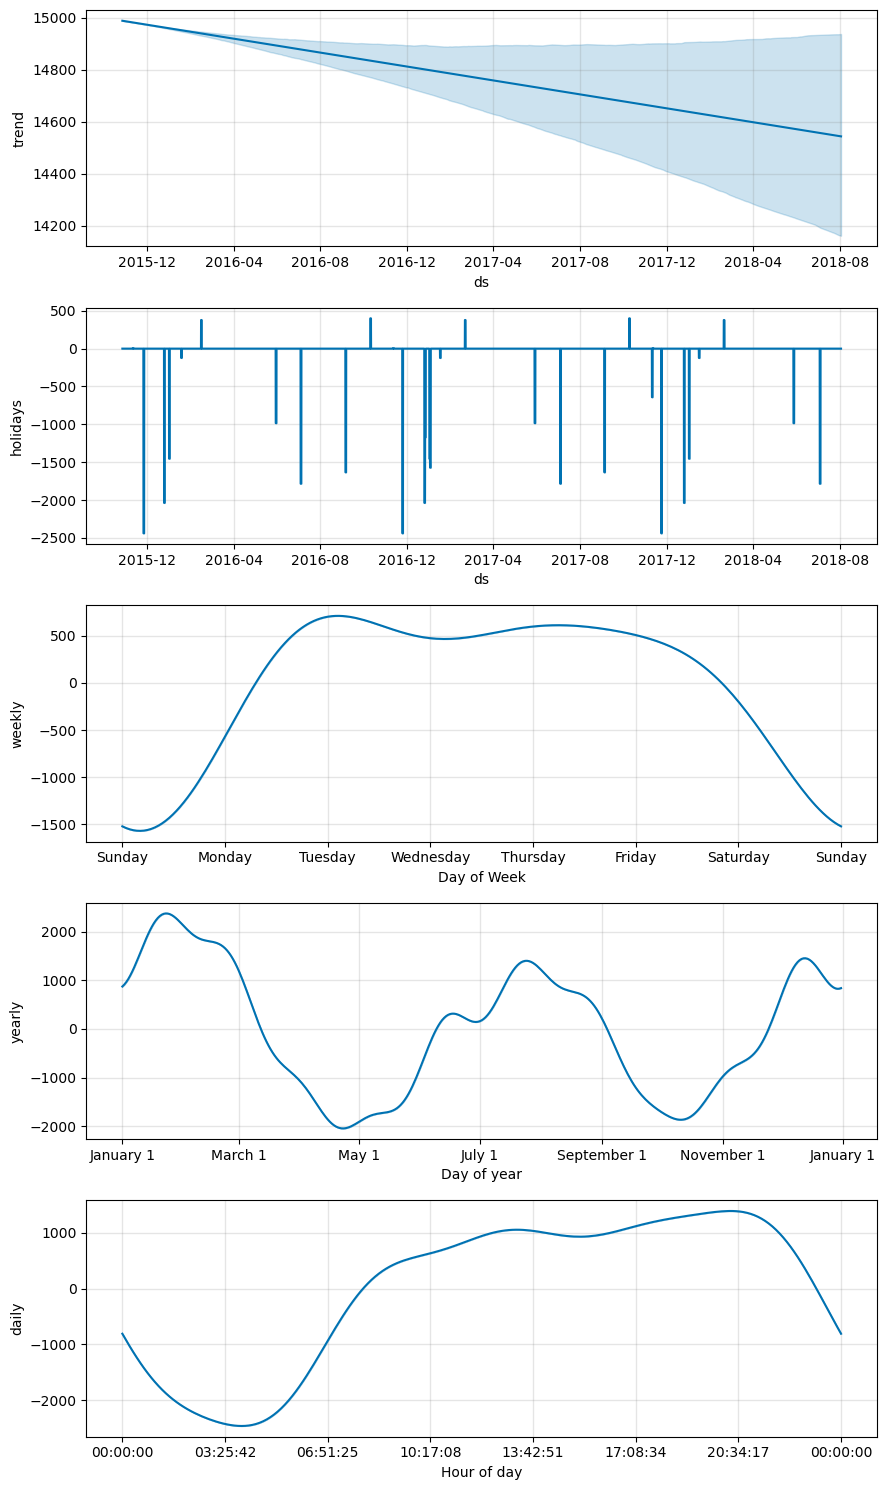

In [31]:
# Defining the model
m = Prophet(weekly_seasonality = True, yearly_seasonality = True, 
            seasonality_mode = 'additive',
            seasonality_prior_scale = 0.01, changepoint_prior_scale = 0.001)
m.add_country_holidays(country_name = 'US')
m.add_seasonality(name ='daily', period = 1, fourier_order = 5)
# Predicting using the model
m.fit(consump_train)
future   = consump_test.copy()
forecast = m.predict(future)
fig = m.plot_components(forecast)

In [32]:
# Forecasts with time and predicted trip_counts
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-10-27 10:00:00,14971.710147,13078.103242,16984.556076
1,2015-10-27 11:00:00,15113.767423,13170.592903,17211.375417
2,2015-10-27 12:00:00,15295.252038,13320.285414,17275.986519
3,2015-10-27 13:00:00,15392.603725,13399.784718,17206.926769
4,2015-10-27 14:00:00,15338.592446,13290.216222,17381.882758
...,...,...,...,...
24250,2018-08-02 20:00:00,17626.133777,15806.813153,19770.526565
24251,2018-08-02 21:00:00,17567.851748,15624.373664,19678.810388
24252,2018-08-02 22:00:00,17178.779992,15209.510235,19327.916175
24253,2018-08-02 23:00:00,16376.871926,14312.180682,18431.112846


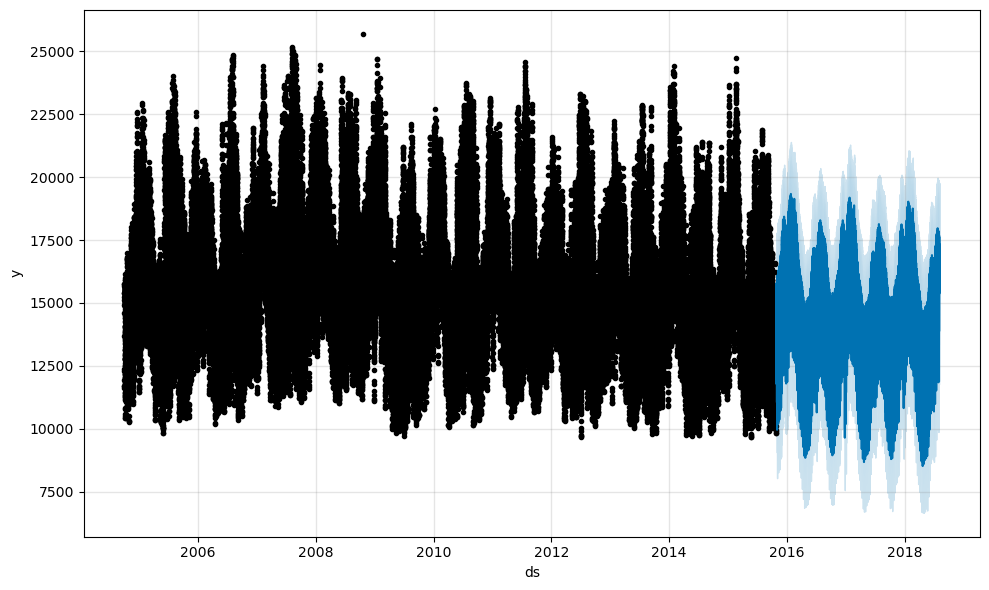

In [33]:
# Plotting Forecasts
fig1 = m.plot(forecast)

In [34]:
# Actual vs Predicted 
# Create the predicted DataFrame without setting 'trip_start' as an index
prophet_df = pd.DataFrame({
    'time': forecast['ds'].values,
    'Predicted_consump': forecast['yhat'].values,
    'Actual_consump':consump_test['y'].values
})

prophet_df

,time,Predicted_consump,Actual_consump
0,2015-10-27 10:00:00,14971.710147,15147.0
1,2015-10-27 11:00:00,15113.767423,14796.0
2,2015-10-27 12:00:00,15295.252038,14718.0
3,2015-10-27 13:00:00,15392.603725,14689.0
4,2015-10-27 14:00:00,15338.592446,14609.0
...,...,...,...
24250,2018-08-02 20:00:00,17626.133777,17673.0
24251,2018-08-02 21:00:00,17567.851748,17303.0
24252,2018-08-02 22:00:00,17178.779992,17001.0
24253,2018-08-02 23:00:00,16376.871926,15964.0


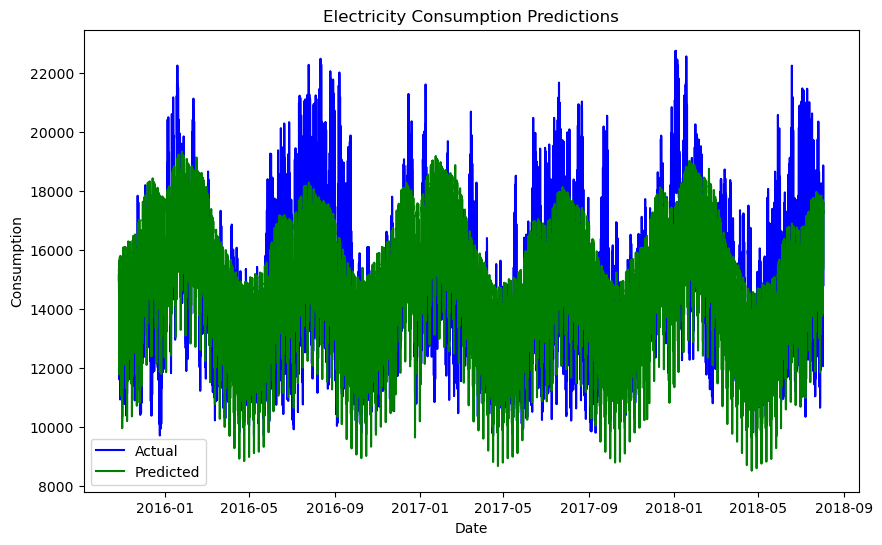

In [35]:
# Plotting The actual vs predicted for Prophet model
plt.figure(figsize=(10, 6))
plt.plot(prophet_df['time'], prophet_df['Actual_consump'], label='Actual', color = 'blue')
plt.plot(prophet_df['time'], prophet_df['Predicted_consump'], label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Electricity Consumption Predictions')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math


# Calculate evaluation metrics
prophet_mse = mean_squared_error(prophet_df['Actual_consump'], prophet_df['Predicted_consump'])
prophet_rmse = math.sqrt(prophet_mse)
prophet_mae = mean_absolute_error(prophet_df['Actual_consump'], prophet_df['Predicted_consump'])
prophet_mape = mean_absolute_percentage_error(prophet_df['Actual_consump'], prophet_df['Predicted_consump'])

print(f'Mean Squared Error: {prophet_mse}')
print(f'Root Mean Squared Error: {prophet_rmse}')
print(f'Mean Absolute Error: {prophet_mae}')
print(f'Mean Absolute Percentage Error: {prophet_mape}')

Mean Squared Error: 3107337.20038584
Root Mean Squared Error: 1762.7640796163962
Mean Absolute Error: 1364.1134405315825
Mean Absolute Percentage Error: 0.09145748505453492
